<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis I

## Table of Contents

1. [Data Loading and Description](#section1)<br>
2. [Data Profiling](#section2)
    - 2.1 [Understanding the Dataset](#section201)<br/>
    - 2.2 [Pre Profiling](#section202)<br/>
    - 2.3 [Preprocessing](#section203)<br/>
    - 2.4 [Post Profiling](#section204)<br/>
3. [Questions](#section3)
    - 3.1 [ Which team has played how many matches ?](#section301)<br/>
    - 3.2 [ Who are the Top 5 batsman in IPL based on teams?](#section302)<br/>
    - 3.3 [ Most successful team in IPL?](#section303)<br/>
    - 3.4 [What is the win % of all the teams?](#section304)<br/>
    - 3.5 [What is the win to loose ratio for all the teams?](#section305)<br/>
    - 3.6 [Who has maximum average last 5 over score?](#section306)<br/>
    - 3.6 [ Hypothesis: Team having good run rate in last 5 overs have more chances of winning the game](#section307)<br/>
4. [Conclusions](#section4)<br/>  


<a id=section1></a>

<a id=section1></a>

### 1. Data Loading and Description


- The dataset consists of the information about ball by ball details of IPL matches of all the seasons. Various variables present in the dataset includes data of batting team,bowling team,innings,over,score details by ball including extra runs. 
- The dataset comprises of __164750 observations of 21 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Match_id      | MatchID                                                   | 
| inning        | First or Second inning of the match                       |  
| batting_team  | Batting Team Name                                         | 
| bowling_team  | Bowling Team Name                                         |   
| over          | Current Over                                              |
| ball          | Current ball                                              |
| batsman       | Batsman on Strike                                         |
| non_striker   | Non Striker Batsman                                       |
| bowler        | Current Bowler                                            |
| is_super_over | Shows if the current over is super over                   |
| wide_runs     | Score in wide                                             |
| bye_runs      | Bye Runs                                                  | 
| legbye_runs   | Leg bye runs                                              |  
| noball_runs   | Score on no ball                                          | 
| penalty_runs  | Penalty run                                               |   
| batsman_runs  | Run scored by batsman on the ball                         |
| extra_runs    | Extra scored on ball                                      |
| total_runs    | Total Run                                                 |
| player_dismissed   | Details of player who got out                        |
| dismissal_kind| Dismissal type                                            |
| fielder       | Fielder details                                           |

#### Some Background Information
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing 8 Indian cities and some states.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league.IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.The brand value of IPL in 2018 was 6.3 billion USD , according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion (US$ 182 million) to the GDP of the Indian economy.

There have been eleven seasons of the IPL tournament. The current IPL title holders are the Chennai Super Kings, who won the 2018 season.

#### Importing packages                                          

In [10]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()






#### Importing the Dataset

In [11]:
deliveries=pd.read_csv("D:/DataScience/Term-1-master/Data/Projects/deliveries.csv")     # Importing training dataset using pd.read_csv

<a id=section2></a>

## 2. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section201></a>

### 2.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [12]:
deliveries.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(164750, 21)

deliveries has __164750 rows__ and __21 columns.__

In [13]:
deliveries.columns                                            # This will print the names of all columns.

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [14]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<a id=section201></a>

In [15]:
deliveries.tail()                                                   # This will print the last n rows of the Data Frame

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
164745,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,5,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
164746,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,6,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164747,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,1,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164748,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,2,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164749,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,3,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [16]:
deliveries.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [17]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [18]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

From the above output we can see that __Player_dismissed__,__dismissa_kind__ and __fielder__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section202></a>

### 2.2 Pre Profiling

In [19]:
profile = pandas_profiling.ProfileReport(deliveries)
profile.to_file(outputfile="deliveries_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __deliveries_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

### 2.3 Preprocessing

- Dealing with missing values<br/>
    
    - Dropping the column __Player_dismissed,dismissa_kind and fielder__ as it has too many _null_ values.
    

In [21]:
deliveries.drop('player_dismissed', axis = 1,inplace = True)

In [14]:
deliveries.drop('dismissal_kind', axis = 1,inplace = True)

In [15]:
deliveries.drop('fielder', axis = 1,inplace = True)

In [25]:
deliveries1=deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants')

We have noticed for pune team there are two entries __Rising Pune Supergiant__ and __Rising Pune Supergiants__.We will replace the error entries with __Rising Pune Supergiants__ . 

<a id=section204></a>

## 2.4 Post Pandas Profiling

In [23]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(deliveries)
profile.to_file(outputfile="deliveries_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also replaced __Rising Pune Supergiant__ with __Rising Pune Supergiants__ to have uniform values.

<a id=section3></a>

### 3. Questions

In [27]:
totalruns=deliveries1.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum()
#totalruns

In [28]:
print(type(totalruns))
pre_winner_loser=pd.DataFrame(totalruns)
print(type(pre_winner_loser))
show_result=pre_winner_loser.copy()
show_result['Result']=np.NaN
show_result.reset_index(inplace=True)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
def determine_winner(input_df):
    for i in range(0,input_df.shape[0],2):
        if (input_df.iloc[i,4] > input_df.iloc[i+1,4]):
            #print(input_df.iloc[i,4],input_df.iloc[i+1,4])
            input_df.iloc[i,5]='Winner'
            input_df.iloc[i+1,5]='Loser'
        elif (input_df.iloc[i,4] < input_df.iloc[i+1,4]):
            #print(input_df.iloc[i,4],input_df.iloc[i+1,4])
            input_df.iloc[i,5]='Loser'
            input_df.iloc[i+1,5]='Winner'
        else:
            pass
determine_winner(show_result)         

In [36]:
#show_result
Teams=deliveries1['bowling_team'].unique()
Teams.tolist()

['Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Rising Pune Supergiants',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors']

In [40]:
result_teams=show_result.groupby(['batting_team','Result'])['Result'].count()
result_team=pd.DataFrame(result_teams)
result_team.rename(index=str, columns={"Result": "Count"},inplace=True)


In [41]:
result_team

Count
batting_team                Result       
Chennai Super Kings         Loser      59
                            Winner     86
Deccan Chargers             Loser      40
                            Winner     34
Delhi Daredevils            Loser      89
                            Winner     71
Gujarat Lions               Loser      17
                            Winner     13
Kings XI Punjab             Loser      87
                            Winner     74
Kochi Tuskers Kerala        Loser       8
                            Winner      6
Kolkata Knight Riders       Loser      86
                            Winner     76
Mumbai Indians              Loser      72
                            Winner     98
Pune Warriors               Loser      29
                            Winner     16
Rajasthan Royals            Loser      66
                            Winner     67
Rising Pune Supergiants     Loser      16
                            Winner     14
Royal Challengers Bangalore Loser      85
                            Winner     82
Sunrisers Hyderabad         Loser      37
                            Winner     54

In [43]:
def number_of_match():
    count1=totalruns.groupby('batting_team').count()
    return (dict(count1))
d=number_of_match()
print(d)
      
winprecent=pd.DataFrame.from_dict(d1,orient='index')
winprecent.index.names=["Team"]
winprecent.reset_index(inplace=True)
winprecent.columns=['Team','Total Match']
winprecent

{'Chennai Super Kings': 148, 'Deccan Chargers': 75, 'Delhi Daredevils': 162, 'Gujarat Lions': 31, 'Kings XI Punjab': 164, 'Kochi Tuskers Kerala': 14, 'Kolkata Knight Riders': 166, 'Mumbai Indians': 172, 'Pune Warriors': 45, 'Rajasthan Royals': 135, 'Rising Pune Supergiants': 30, 'Royal Challengers Bangalore': 168, 'Sunrisers Hyderabad': 94}


,Team,Total Match
0,Royal Challengers Bangalore,167
1,Sunrisers Hyderabad,91
2,Rising Pune Supergiants,30
3,Mumbai Indians,170
4,Kolkata Knight Riders,162
5,Gujarat Lions,30
6,Kings XI Punjab,161
7,Delhi Daredevils,160
8,Chennai Super Kings,145
9,Rajasthan Royals,133


In [45]:
dict2={}
dict3={}
dict4={}
d1={}
list2=[]
win=[]

def wincountfunc():
    for i in Teams:
        dict2[i]=(result_team.loc[i].loc['Winner']['Count'])
    return dict2
dict2=wincountfunc()

def loosecountfunc():
    for i in Teams:
        dict3[i]=(result_team.loc[i].loc['Loser']['Count'])
    return dict3

dict3=loosecountfunc()

def tiecount():
    for i in Teams:
        dict4[i]=d[i]-(dict2[i]+dict3[i])
        
    return dict4

dict4=tiecount()
def actualtotalmatch():
    for i in Teams:
        d1[i]=d[i]-dict4[i]
    return d1

d1=actualtotalmatch()


for key,val in d1.items():
    win.append(dict2[key])
    val=round((dict2[key]/d1[key])*100,2)
    list2.append(val)


se1=pd.Series(list2)
se2=pd.Series(win)
winprecent['Wins']=se2.values
winprecent['Win_Percent']=se1.values

winprecent

,Team,Total Match,Wins,Win_Percent
0,Royal Challengers Bangalore,167,82,49.10
1,Sunrisers Hyderabad,91,54,59.34
2,Rising Pune Supergiants,30,14,46.67
3,Mumbai Indians,170,98,57.65
4,Kolkata Knight Riders,162,76,46.91
5,Gujarat Lions,30,13,43.33
6,Kings XI Punjab,161,74,45.96
7,Delhi Daredevils,160,71,44.38
8,Chennai Super Kings,145,86,59.31
9,Rajasthan Royals,133,67,50.38


<a id=section301></a>

### 3.1 Which team has played how many matches ?

- Using Countplot

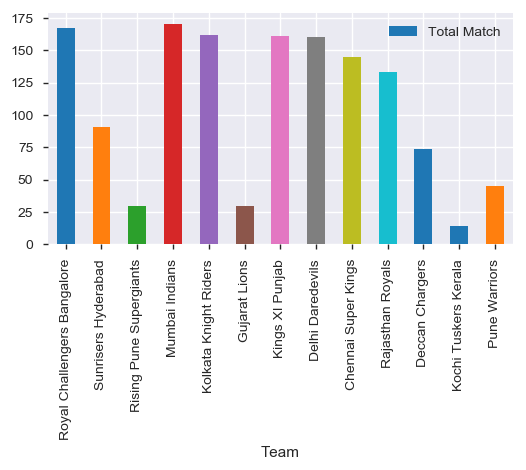

In [88]:
plt.rcParams['figure.figsize']=(6,3)
winprecent.plot(x='Team', y='Total Match', kind='bar') 
plt.show()

We can see that __Rising Pune Supergiants,Gujurat Lions,Kochi Tuskar Kerala,Pune Warriors__ have less matches as compare to other teams as they came in later part of IPL seasons to replace few other banned teams.

<a id=section302></a>

### 3.2 Who are the Top 5 batsman in IPL based on teams?

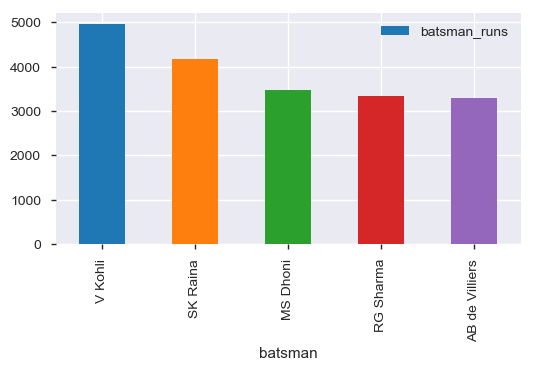

In [89]:
Topbatsman=deliveries1.groupby(['batting_team','batsman'])['batsman_runs'].agg('sum').nlargest(5)
Topbatsman=pd.DataFrame(Topbatsman)
Topbatsman.reset_index(inplace=True)
plt.rcParams['figure.figsize']=(6,3)
Topbatsman.plot(x='batsman', y='batsman_runs', kind='bar') 
plt.show()

In [48]:
Topbatsman

,batting_team,batsman,batsman_runs
0,Royal Challengers Bangalore,V Kohli,4962
1,Chennai Super Kings,SK Raina,4173
2,Chennai Super Kings,MS Dhoni,3467
3,Mumbai Indians,RG Sharma,3334
4,Royal Challengers Bangalore,AB de Villiers,3303


- __Virat Kohli__ has scored most runs among all batsmans.
- There are 2 players each from __RCB__ and __CSK__ in top 5 batsman.

<a id=section303></a>

### 3.3 Most successful team in IPL?

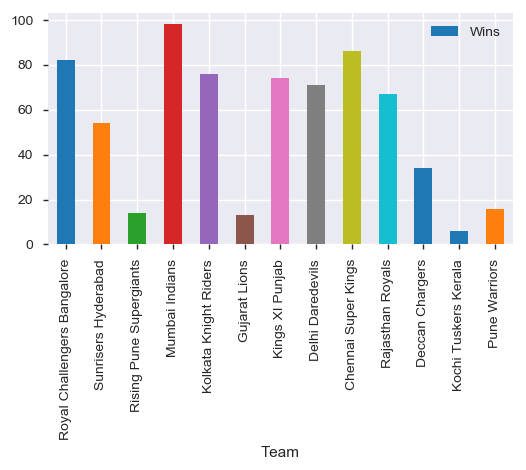

In [90]:
plt.rcParams['figure.figsize']=(6,3)
winprecent.plot(x='Team', y='Wins', kind='bar') 
plt.show()

We can see __Mumbai Indians__ is the most sucessful team in IPL.

<a id=section304></a>

### 3.4 What is the win % of all the teams?

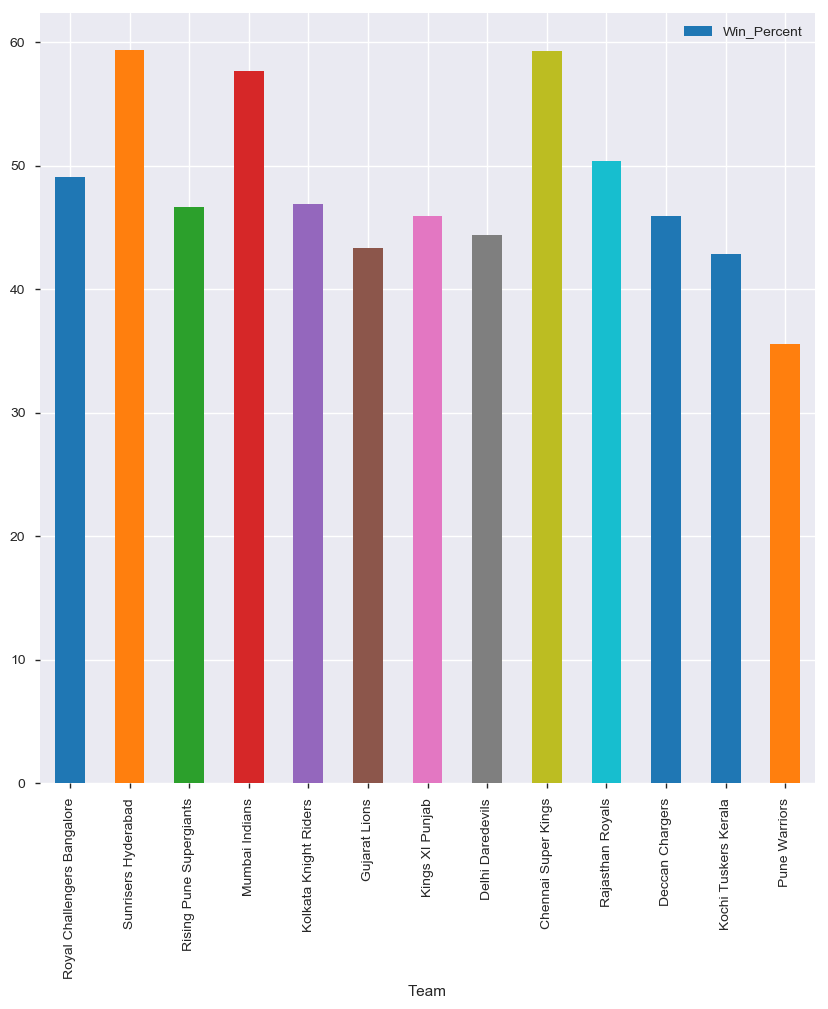

In [50]:
plt.rcParams['figure.figsize']=(10,10)
winprecent.plot(x='Team', y='Win_Percent', kind='bar') 
plt.show()

In [51]:
winprecent

,Team,Total Match,Wins,Win_Percent
0,Royal Challengers Bangalore,167,82,49.10
1,Sunrisers Hyderabad,91,54,59.34
2,Rising Pune Supergiants,30,14,46.67
3,Mumbai Indians,170,98,57.65
4,Kolkata Knight Riders,162,76,46.91
5,Gujarat Lions,30,13,43.33
6,Kings XI Punjab,161,74,45.96
7,Delhi Daredevils,160,71,44.38
8,Chennai Super Kings,145,86,59.31
9,Rajasthan Royals,133,67,50.38


We can see __Chennai Super Kings__ and __Sunrisers Hyderabad__ have almost same win % but __Chennai Super Kings__ have played more matches than __Sunrisers Hyderabad__.

<a id=section305></a>

### 3.5. What is the win to loose ratio for all the teams?

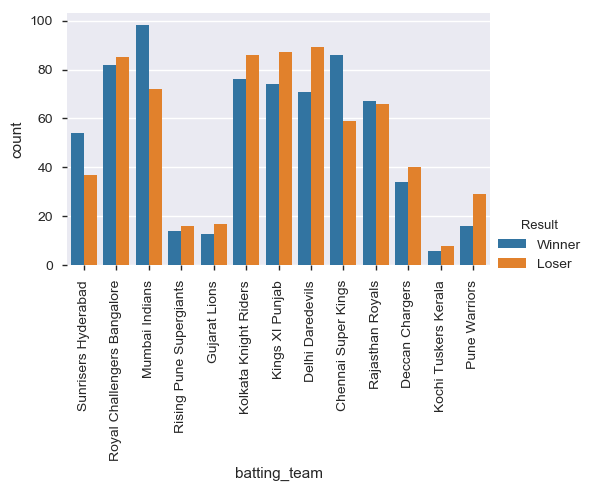

In [91]:
a=sns.catplot('batting_team', hue='Result', kind='count', data=show_result);
a.set_xticklabels(rotation=90)
a.fig.set_size_inches(6,3)

- We can see __Mumbai Indians__ has the highest win to loose ratio in IPL .

<a id=section306></a>

### 3.6 Who has maximum average last 5 over score?

In [63]:
last5over=deliveries1[((deliveries1['over'] >=15) & (deliveries1['over'] <=20))]
last5over=last5over.groupby(['batting_team'])['total_runs'].sum().nlargest(13)


In [85]:
last5overscore=pd.DataFrame(last5over)
last5overscore.reset_index(inplace=True)

teamtoscore={}

def last5overscoretodict():
    j=last5overscore.shape[0]
    for i in range(0,j):
        teamtoscore[last5overscore.iloc[i,0]]=last5overscore.iloc[i,1]
   # print(teamtoscore)
    
last5overscoretodict()

In [86]:
avgscore={}
def avglast5overscore():
    for key,val in d1.items():
        avgscore[key]=round(teamtoscore[key]/d1[key],2)
    #print(avgscore)
    
avglast5overscore()

avg_df=pd.DataFrame.from_dict(avgscore,orient='index')
avg_df.index.names=["Team"]
avg_df.reset_index(inplace=True)
avg_df.columns=['Team','Avg']
avg_df

,Team,Avg
0,Royal Challengers Bangalore,51.09
1,Sunrisers Hyderabad,53.32
2,Rising Pune Supergiants,47.90
3,Mumbai Indians,54.18
4,Kolkata Knight Riders,47.54
5,Gujarat Lions,46.13
6,Kings XI Punjab,49.53
7,Delhi Daredevils,46.22
8,Chennai Super Kings,55.64
9,Rajasthan Royals,46.66


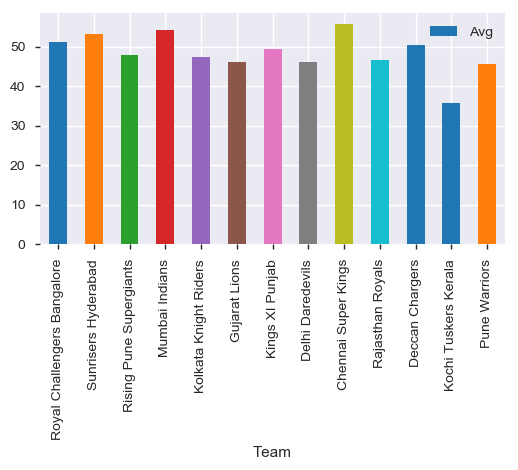

In [93]:
plt.rcParams['figure.figsize']=(6,3)
avg_df.plot(x='Team', y='Avg', kind='bar') 
plt.show()

We can see __Mumbai Indians and Chennai Super Kings__ have average of 54 and 55.

<a id=section307></a>

### 3.7 Hypothesis: Team having good run rate in last 5 overs have more chances of winning the game

On studying above Questionnaires we observed that the teams having nice aveage in last 5 overs of the match havewon more matches in total.
__Mumbai Indians__ are on top followed by __Chennai Super KIngs__


<a id=section4></a>

## 4. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- The most important inference drawn from all this analysis is, we get to know what are the winning percentages of each team and how it is related to last 5 over score average.
